In [1]:
# Import the pandas library as pd
import pandas as pd

# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('../datasets/police.csv')

ri.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [2]:
ri.index

RangeIndex(start=0, stop=91741, step=1)

In [3]:
ri.columns

Index(['state', 'stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type', 'stop_outcome', 'is_arrested', 'stop_duration',
       'drugs_related_stop', 'district'],
      dtype='object')

In [4]:
ri.attrs

{}

In [5]:
# Count the number of missing values in each column
print(ri.isnull().sum())

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


In [6]:
# Examine the shape of the DataFrame
print(ri.shape)

# Drop the 'county_name' and 'state' columns
ri.drop(['county_name', 'state'], axis='columns', inplace=True)

# Examine the shape of the DataFrame (again)
print(ri.shape)

(91741, 15)
(91741, 13)


In [7]:
# Count the number of missing values in each column
print(ri.isnull().sum())

stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


In [8]:
# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

# Count the number of missing values in each column (again)
print(ri.isnull().sum())

# Examine the shape of the DataFrame
print(ri.shape)

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64
(86536, 13)


In [9]:
print(ri.is_arrested.head())

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object


In [10]:
# Check the data type of 'is_arrested'
print(ri.is_arrested.dtype)

# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype("bool")

# Check the data type of 'is_arrested' (again)
print(ri.is_arrested.dtype)

object
bool


In [11]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep = ' ')

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

# Examine the data types of the DataFrame
print(ri.dtypes)

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object


In [12]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

# Examine the index
print(ri.index)

# Examine the columns
print(ri.columns)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)
Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')


# Calculating the hourly arrest rate
When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the arrest rate. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops in the ri DataFrame. Then, you'll calculate the hourly arrest rate by using the hour attribute of the index. The hour ranges from 0 to 23, in which:

- 0 = midnight
- 12 = noon
- 23 = 11 PM

In [13]:
hour = range(0,24)

# Calculate the overall arrest rate
print(ri.is_arrested.mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.0355690117407784
stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


# Plotting the hourly arrest rate
In this exercise, you'll create a line plot from the hourly_arrest_rate object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

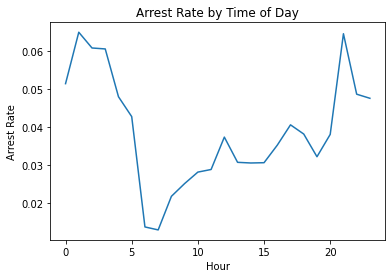

In [14]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

# Plotting drug-related stops
In a small portion of traffic stops, drugs are found in the vehicle during a search. In this exercise, you'll assess whether these drug-related stops are becoming more common over time.

The Boolean column drugs_related_stop indicates whether drugs were found during a given stop. You'll calculate the annual drug rate by resampling this column, and then you'll use a line plot to visualize how the rate has changed over time.

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


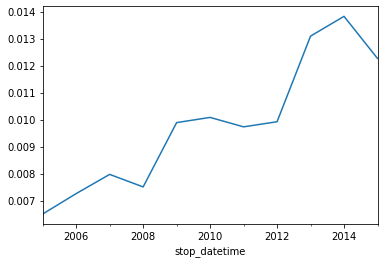

In [15]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

# Comparing drug and search rates
As you saw in the last exercise, the rate of drug-related stops increased significantly between 2005 and 2015. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

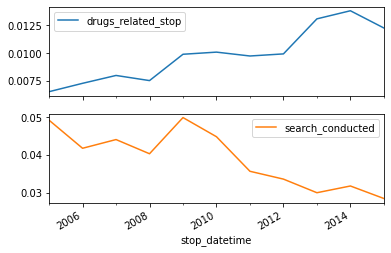

In [16]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis= 'columns')

# Create subplots from 'annual'
annual.plot(subplots = True)

# Display the subplots
plt.show()

# Tallying violations by district
The state of Rhode Island is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the "K" zones, which you'll examine further in the next exercise.

In [17]:
# Create a frequency table of districts and violations
pd.crosstab(ri.district, ri.violation)

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322
Zone X1,296,671,143,38,74,1119
Zone X3,2049,3086,769,671,820,8779
Zone X4,3541,5353,1560,1411,843,9795


In [18]:
# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

In [19]:
# Select rows 'Zone K1' through 'Zone K3'
all_zones.loc['Zone K1': 'Zone K3', :]

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322


In [20]:
# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1': 'Zone K3', :]

# Plotting violations by district
Now that you've created a frequency table focused on the "K" zones, you'll visualize the data to help you compare what violations are being caught in each zone.

First you'll create a bar plot, which is an appropriate plot type since you're comparing categorical data. Then you'll create a stacked bar plot in order to get a slightly different look at the data. Which plot do you find to be more insightful?

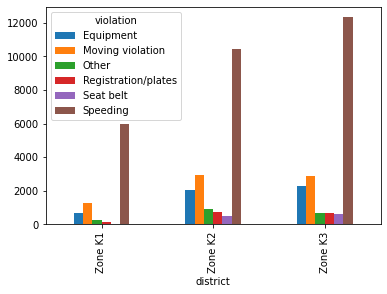

In [21]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind = 'bar')


# Display the plot
plt.show()

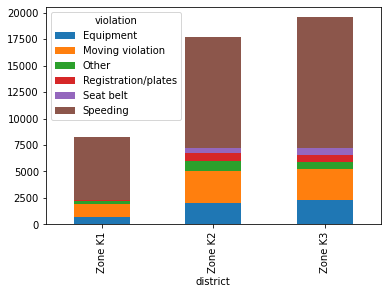

In [22]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind = 'bar', stacked = True)

# Display the plot
plt.show()

# Converting stop durations to numbers
In the traffic stops dataset, the stop_duration column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as strings, such as '0-15 Min'. How can you make this data easier to analyze?

In this exercise, you'll convert the stop durations to integers. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

- Convert '0-15 Min' to 8
- Convert '16-30 Min' to 23
- Convert '30+ Min' to 45

In [23]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' '30+ Min']
[ 8 23 45]


# Plotting stop length
If you were stopped for a particular violation, how long might you expect to be detained?

In this exercise, you'll visualize the average length of time drivers are stopped for each type of violation. Rather than using the violation column in this exercise, you'll use violation_raw since it contains more detailed descriptions of the violations.

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


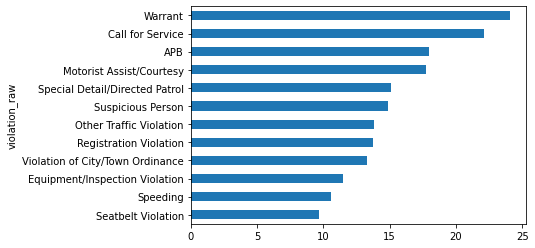

In [25]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind = 'barh')

# Display the plot
plt.show()